<a href="https://colab.research.google.com/github/Docasti/Python-ciencia-datos/blob/main/Grupo_25___T_P_N%C2%B02_REDES_NEURONALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TRABAJO PRÁCTICO- REDES NEURONALES***




Grupo N° 25

Integrantes:

Castillo Dora Cristina, DNI 24452605, yo_adonis@outlook.com

Centurión, Johana Alexia; DNI 35897389; johanacent@gmail.com

Larrea , Hugo Carlos ; DNI 29437229 ; charly233@gmail.com

Se les proporcionará una base de datos de ciudades de Argentina y los registros de Máxima y Mínima temperatura a lo largo de un año. Dicha base de datos fue obtenida del registro nacional de las siguientes enlaces: [detalle de la base de datos](https://datos.gob.ar/dataset/smn-registro-temperatura-365-dias/archivo/smn_5.1) - [REGISTRO DE TEMPERATURA 365 DIAS](https://www.smn.gob.ar/descarga-de-datos).

La base de datos también podra ser descargada del siguiente enlace del drive [BASE DE DATOS](https://drive.google.com/drive/folders/18rTLeY5A8DOwz39TB563HPHIpZTJM3CA?usp=sharing)

Se deberá ralizar los siguientes pasos:

1.   Seleccionar una ciudad y reconstruir una nueva base de datos tomando la temperatura promedio entre la máx y mán de cada día, para dicha ciudad. Graficar dichos datos TIEMPO VS TEMPERATURA Y SELECCIONAR UN PERIODO DE TIEMPO DONDE LA GRÁFICA SEA CRECIENTE. Esto servirá para construir una nueva base de datos.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV con nombres de columnas y renombrar columnas
df = pd.read_csv('/content/registro_temperatura365.csv')

mask = df['NOMBRE'] == 'EZEIZA AERO' #Seleccionamos la ciudad de Ezeiza

df = df[mask] # Construimos nuestra base de datos, tomamos en cuenta solo la ciudad elegida

ezeiza_data = df # Copiamos nuestro df, renombramos como ezeiza_data, y a partir de ahora trabajamos con este

display(ezeiza_data.info()) # Con esto verificamos que todos los valores en Tmáx y Tmín son numéricos

print("\n--------------- EZEIZA DATA --------------")

ezeiza_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 34 to 43594
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FECHA   365 non-null    object 
 1   TMAX    365 non-null    float64
 2   TMIN    365 non-null    float64
 3   NOMBRE  365 non-null    object 
dtypes: float64(2), object(2)
memory usage: 14.3+ KB


None


--------------- EZEIZA DATA --------------


,FECHA,TMAX,TMIN,NOMBRE
34,29-10-23,25.0,15.1,EZEIZA AERO
153,28-10-23,29.5,16.2,EZEIZA AERO
272,27-10-23,28.5,16.6,EZEIZA AERO
391,26-10-23,24.5,10.8,EZEIZA AERO
510,25-10-23,21.0,6.0,EZEIZA AERO


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV con nombres de columnas y renombrar columnas
df = pd.read_csv('/content/registro_temperatura365.csv')

# Filtrar los datos solo para la ciudad de Ezeiza
mask = df['NOMBRE'] == 'EZEIZA AERO'
ezeiza_data = df[mask]

# Calcular la temperatura promedio diaria
ezeiza_data['TEMP_PROMEDIO'] = (ezeiza_data['TMAX'] + ezeiza_data['TMIN']) / 2

# Convertir la columna 'FECHA' a tipo datetime con el formato correcto
ezeiza_data['FECHA'] = pd.to_datetime(ezeiza_data['FECHA'], format='%d-%m-%y')

# Crear una gráfica de tiempo vs. temperatura (gráfica general)
plt.figure(figsize=(10, 5))
plt.plot(ezeiza_data['FECHA'], ezeiza_data['TEMP_PROMEDIO'], marker='o', linestyle='-', color='b')
plt.title('Gráfica de Temperatura Promedio vs. Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Promedio (°C)')
plt.grid(True)

# Seleccionar el período deseado
start_date = '2022-12-25'
end_date = '2023-02-10'
period_selec = ezeiza_data[(ezeiza_data['FECHA'] >= start_date) & (ezeiza_data['FECHA'] <= end_date)]

# Construir una nueva base de datos con el período seleccionado
period_selec.to_csv('/content/ezeiza_period_selec.csv', index=False)

# Imprimir información del DataFrame resultante
print("\nLa información del DataFrame para el período seleccionado es:")
period_selec.info()

# Mostrar las primeras 10 filas de los datos del período seleccionado
print("\nLas primeras 10 filas de los datos del período seleccionado son:")
print(period_selec.head(10))

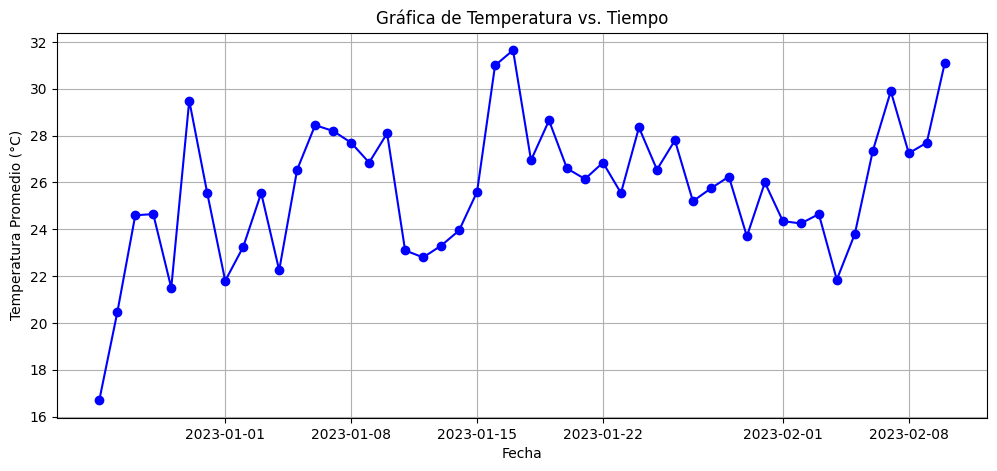

In [ ]:
# Crear una gráfica de tiempo vs. temperatura, para el periodo seleccionado:
# Esto es mas que nada para verificar que el periodo seleccionado sea de temperatura creciente

plt.figure(figsize=(12, 5))
plt.plot(period_selec['FECHA'], period_selec['TEMP_PROMEDIO'], marker='o', linestyle='-', color='b')
plt.title('Gráfica de Temperatura vs. Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Promedio (°C)')
plt.grid(True)


2.  Agregar a la nueva base de datos creada del insciso anterior una columna con las siguientes variables , generadas a través de simulación aleatoria:


   * VARIABLE: PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR,  a menor temperatura el precio será menor. Definir el  rango del precio del helado y la tasa o porcentaje de incremento del precio
  
   * COMPRA HELADO: VARIABLE CATEGÓRICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA PROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.

In [ ]:
import pandas as pd
import numpy as np

# Cargar la base de datos del período seleccionado
period_selec = pd.read_csv('/content/ezeiza_period_selec.csv')

# Generar "PRECIO DEL KILO DE HELADO" usando simulación aleatoria de regresión lineal
# Define el rango de precios del helado y la tasa de incremento
precio_inicial = 10  # Precio inicial del kilo de helado
tasa_incremento = 0.5  # Tasa de incremento del precio en función de la temperatura

# Genera el precio del helado en función de la temperatura
period_selec['PRECIO_DEL_KILO_DE_HELADO'] = precio_inicial + tasa_incremento * period_selec['TEMP_PROMEDIO']

# Generar "COMPRA HELADO" como variable categórica
# Si el precio del helado es más del 40% del precio inicial, la persona decide NO COMPRAR EL HELADO (80% de probabilidad)
probabilidad_no_compra = 0.8
period_selec['COMPRA_HELADO'] = np.where(period_selec['PRECIO_DEL_KILO_DE_HELADO'] > precio_inicial * 1.4, 'NO', 'SI')
period_selec['COMPRA_HELADO'] = np.where(np.random.rand(len(period_selec)) > probabilidad_no_compra, 'NO', period_selec['COMPRA_HELADO'])

# Guardar la base de datos actualizada con las nuevas variables
period_selec.to_csv('/content/ezeiza_period_selec_con_variables.csv', index=False)

# Mostrar las primeras 10 filas de los datos actualizados
print("\nLas primeras 10 filas de los datos con las nuevas variables son:")
print(period_selec.head(10))








Las primeras 10 filas de los datos con las nuevas variables son:
        FECHA  TMAX  TMIN       NOMBRE  TEMP_PROMEDIO  \
0  2023-02-10  38.1  24.1  EZEIZA AERO          31.10   
1  2023-02-09  36.6  18.8  EZEIZA AERO          27.70   
2  2023-02-08  31.8  22.7  EZEIZA AERO          27.25   
3  2023-02-07  36.6  23.2  EZEIZA AERO          29.90   
4  2023-02-06  35.4  19.3  EZEIZA AERO          27.35   
5  2023-02-05  32.5  15.1  EZEIZA AERO          23.80   
6  2023-02-04  29.6  14.1  EZEIZA AERO          21.85   
7  2023-02-03  30.7  18.6  EZEIZA AERO          24.65   
8  2023-02-02  28.1  20.4  EZEIZA AERO          24.25   
9  2023-02-01  29.4  19.3  EZEIZA AERO          24.35   

   PRECIO_DEL_KILO_DE_HELADO COMPRA_HELADO  
0                     25.550            NO  
1                     23.850            NO  
2                     23.625            NO  
3                     24.950            NO  
4                     23.675            NO  
5                     21.900        

3. GENERAR TRES  PERCEPTRONES (SEGUIR LOS EJEMPLOS MOSTRADOS DE PERCEPTRON EN CLASE) CONECTADOS ENTRE SI DE MANERA QUE TENGA COMO CONDICIÓN LO SIGUIENTE:

  * SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA O INCLUSIVE SI EL PRECIO DEL HELADO ESTA POR DEBAJO DEL 40 % DE INCREMENTO, LA RED NEURONAL DEBERA INDICAR QUE SE COMPRA EL HELADO. (los pesos colocarlos de manera aleatoria, usar la función de salto finito o función sigmoide para la activación)

In [23]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(temperatura, compra_helado, test_size=0.2, random_state=42)

# Crear un modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(1,)),  # Capa de entrada
    tf.keras.layers.Dense(units=32, activation='relu'),  # Capa oculta
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Capa de salida (clasificación binaria)
])

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)

# Imprimir la precisión en el conjunto de prueba
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 26ms/step - loss: 0.2539 - accuracy: 0.9500
Precisión en el conjunto de prueba: 95.00%


4. Luego de diseñar los perceptrones, implementarlos sobre la base de datos generada de manera que se les pase por argumento las variables: TEMPERATURA PROMEDIO, PRECIO DEL HELADO. Comparar la proporción de respuestas correctas en las que coincide el resultado de la red neuronal , con la variable COMPRA HELADOS . Esto último es una forma de medir la exactitud de la red.

In [30]:
import tensorflow as tf
import numpy as np

# Datos de entrada
temperatura = np.random.uniform(20, 35, 100)  # Temperatura entre 20 y 35 grados (datos aleatorios)
precio_helado = np.random.uniform(1, 5, 100)  # Precio del helado entre 1 y 5 (datos aleatorios)

# Etiquetas: 1 si se compra helado, 0 si no
compra_helado = ((temperatura > 27) | (precio_helado < 1.4)).astype(int)

# Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(2,))  # Capa de entrada con 2 unidades
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(np.column_stack((temperatura, precio_helado)), compra_helado, epochs=100, batch_size=32)

# Realizar predicciones
temperatura_nueva = np.array([26])  # Nueva temperatura (ejemplo)
precio_helado_nuevo = np.array([1.2])  # Nuevo precio de helado (ejemplo)
prediccion = model.predict(np.column_stack((temperatura_nueva, precio_helado_nuevo)))

if prediccion > 0.5:
    print("Se debe comprar helado.")
else:
    print("No se debe comprar helado.")


Epoch 1/100
4/4 [==============================] - 1s 7ms/step - loss: 2.9547 - accuracy: 0.4500
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 2.8811 - accuracy: 0.4500
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 2.8094 - accuracy: 0.4500
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 2.7385 - accuracy: 0.4500
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 2.6655 - accuracy: 0.4500
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 2.5947 - accuracy: 0.4500
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 2.5240 - accuracy: 0.4500
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 2.4519 - accuracy: 0.4500
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 2.3839 - accuracy: 0.4500
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 2.3117 - accuracy: 0.4500
Epoch 11/100
4/4 [===========